In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("Iris.csv")
df.head()
df.shape
df.columns
df.tail()
df['Species'].unique()
df['Species'].value_counts()
df.isnull().sum()
df=df.drop('Id' ,axis=1)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Print the correlation among the diffrent  features
df.iloc[:,:-1].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [5]:
x=df.drop('Species',axis=1)
y=df['Species']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)

In [7]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)



In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))


[[33  0  0]
 [ 0 33  2]
 [ 0  1 36]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        33
Iris-versicolor       0.97      0.94      0.96        35
 Iris-virginica       0.95      0.97      0.96        37

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105

0.9714285714285714
0.9714120082815735


In [18]:
# 29 K-fold Cross Validation
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, x, y, cv=10)
print("Cross Validation Score: ", cv_score.mean())





Cross Validation Score:  0.9733333333333334


By Using GridSearchCV

In [20]:

# 30-31. GridSearchCV for best C and kernel

from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
            ]
grid_search=GridSearchCV(estimator=model,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [ ]:
# 32. Specify no of folds for CV: 10 (already specified in `cv=10`)


In [ ]:
# 33. Fit tree on training data - NA (SVM used)


In [21]:
# 34. Scores of grid search
print("\nBest Parameters from GridSearchCV:\n", grid_search.best_params_)
print("Best Accuracy from GridSearchCV:\n", grid_search.best_score_)


Best Parameters from GridSearchCV:
 {'C': 1, 'kernel': 'linear'}
Best Accuracy from GridSearchCV:
 0.9800000000000001


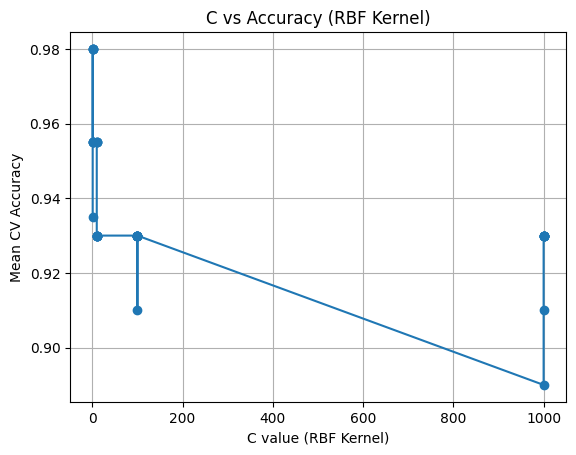

In [22]:
# 35. Plot of C vs scores (only for RBF)
results = pd.DataFrame(grid_search.cv_results_)
rbf_results = results[results['param_kernel'] == 'rbf']
plt.plot(rbf_results['param_C'], rbf_results['mean_test_score'], marker='o')
plt.xlabel('C value (RBF Kernel)')
plt.ylabel('Mean CV Accuracy')
plt.title('C vs Accuracy (RBF Kernel)')
plt.grid()
plt.show()

In [23]:
# 36. Best C and score:
print("\nBest model: ", grid_search.best_estimator_)


Best model:  SVC(C=1, kernel='linear')


In [15]:
grid_search.best_score_

0.9800000000000001

In [16]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Visualization 

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

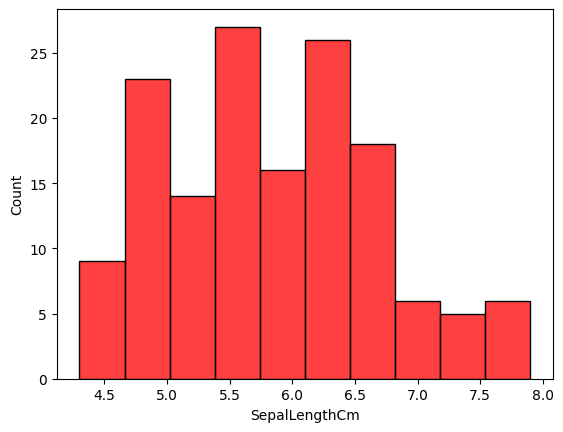

In [10]:
sns.histplot(df['SepalLengthCm'],bins=10,color='red')
# sns.histplot(df['SepalWidthCm'],bins=10)
# sns.histplot(df['PetalLengthCm'],bins=10)
# sns.histplot(df['PetalWidthCm'],bins=10)



<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

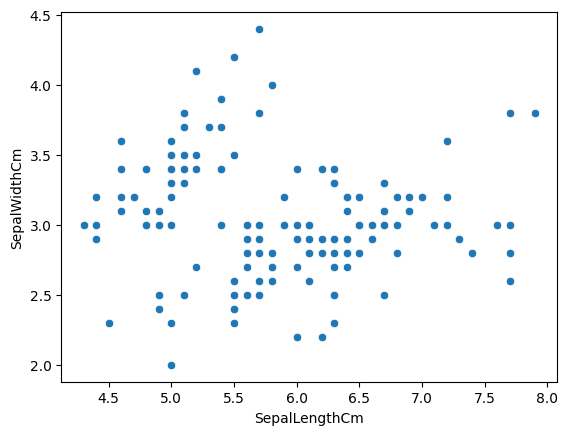

In [11]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df)


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

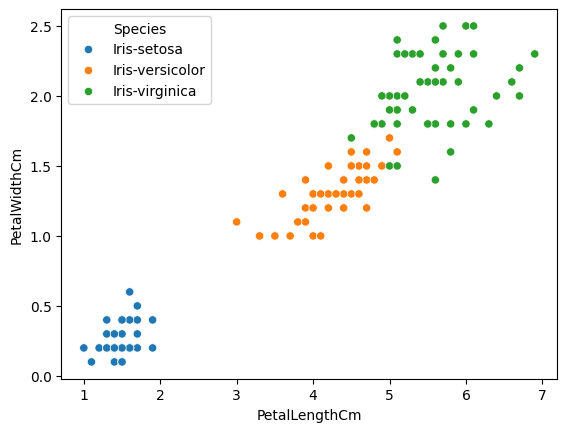

In [12]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df["Species"])




<Axes: xlabel='Species', ylabel='PetalWidthCm'>

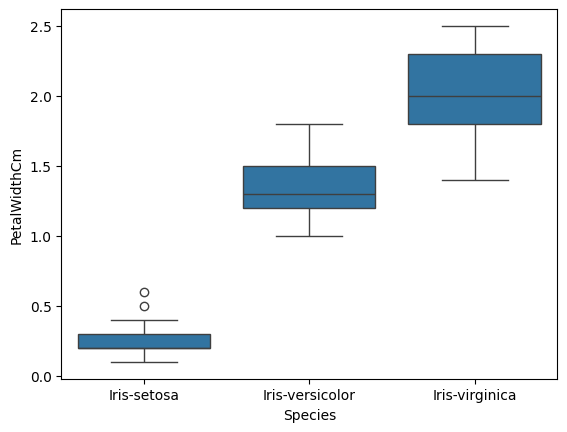

In [13]:
# sns.boxplot(x='Species',y='SepalLengthCm',data=df)
# sns.boxplot(x='Species',y='SepalWidthCm',data=df)
# sns.boxplot(x='Species',y='PetalLengthCm',data=df)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)


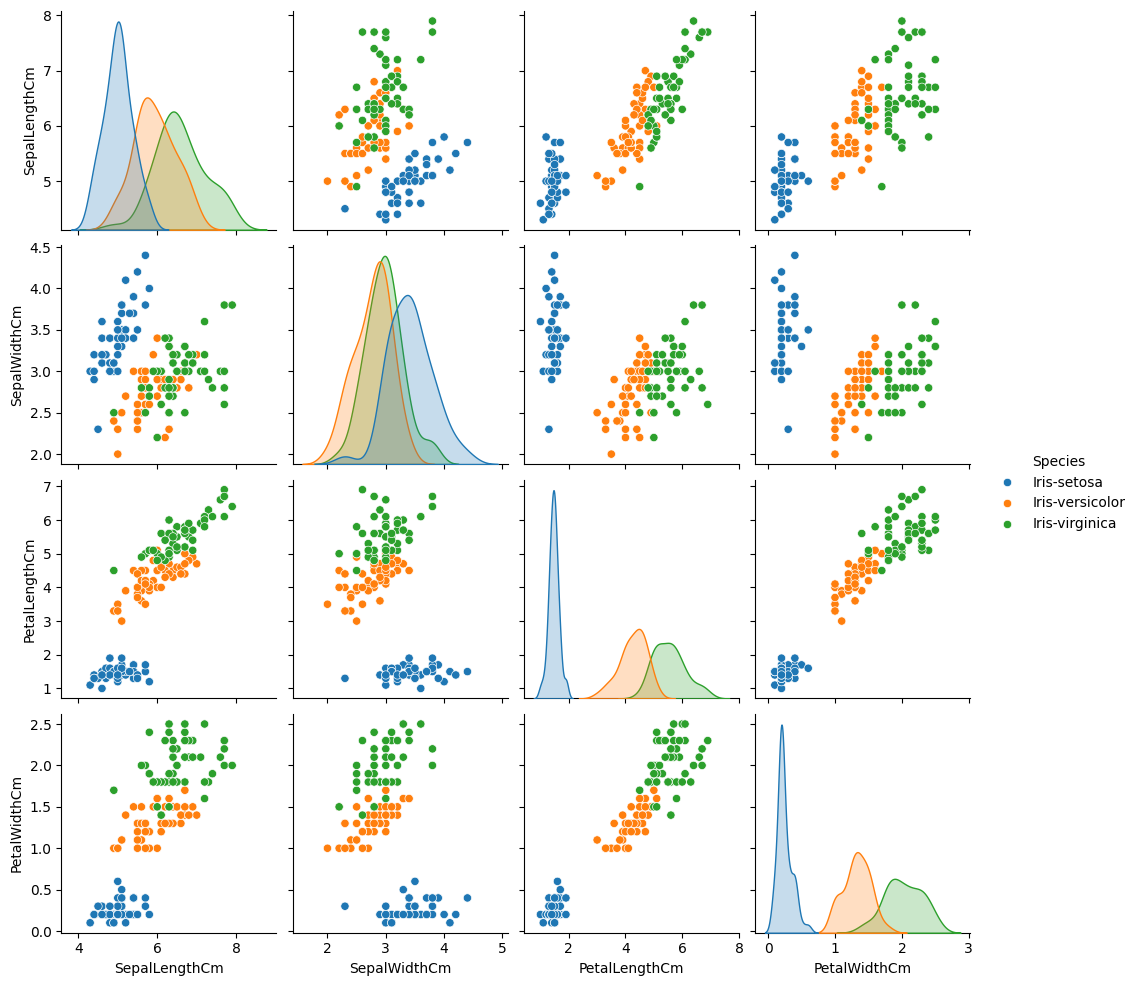

In [14]:
sns.pairplot(df,hue='Species')